# Is podium


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_selection
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


We continue with the selection of the model that predicts the podium


In [2]:
df = pd.read_csv("../assets/data/processed/adding_data.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

podiums = df[df["positionFinal"].isin([1, 2, 3])][
    ["raceYear", "raceRound", "driverRef"]
]
podiums = podiums.groupby(by=["raceYear", "raceRound"]).agg({"driverRef": ",".join})

X = pd.read_csv("../assets/data/processed/adding_data_X.csv")
y = df.merge(podiums, how="left", on=["raceYear", "raceRound"], suffixes=("", "Podium"))
y = y.apply(lambda x: x["driverRef"] in x["driverRefPodium"], axis=1)

## K-Nearest Neighbors


PI: 0.742 with (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20,
	21, 22, 23, 24, 25, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
	47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63) == ('carNumber',
	'circuitAlt', 'circuitCountry', 'circuitDist', 'circuitLat', 'circuitLength',
	'circuitLng', 'circuitRef', 'circuitType', 'constructorNationality', 'constructorRef',
	'constructorWins', 'driverAgeAtRace', 'driverAgeStarted', 'driverAgeToday',
	'driverAwa', 'driverExp', 'driverExpRace', 'driverExpYear', 'driverNationality',
	'driverNumber', 'driverOvr', 'driverPac', 'driverPodiums', 'driverPos10',
	'driverPos11', 'driverPos12', 'driverPos13', 'driverPos14', 'driverPos15',
	'driverPos16', 'driverPos17', 'driverPos18', 'driverPos2', 'driverPos3', 'driverPos4',
	'driverPos5', 'driverPos6', 'driverPos7', 'driverPos8', 'driverPos9', 'driverRac',
	'driverRef', 'driverWins', 'grandPrix', 'positionGrid', 'q1', 'q2', 'q3', 'qAvg',
	'qMax'

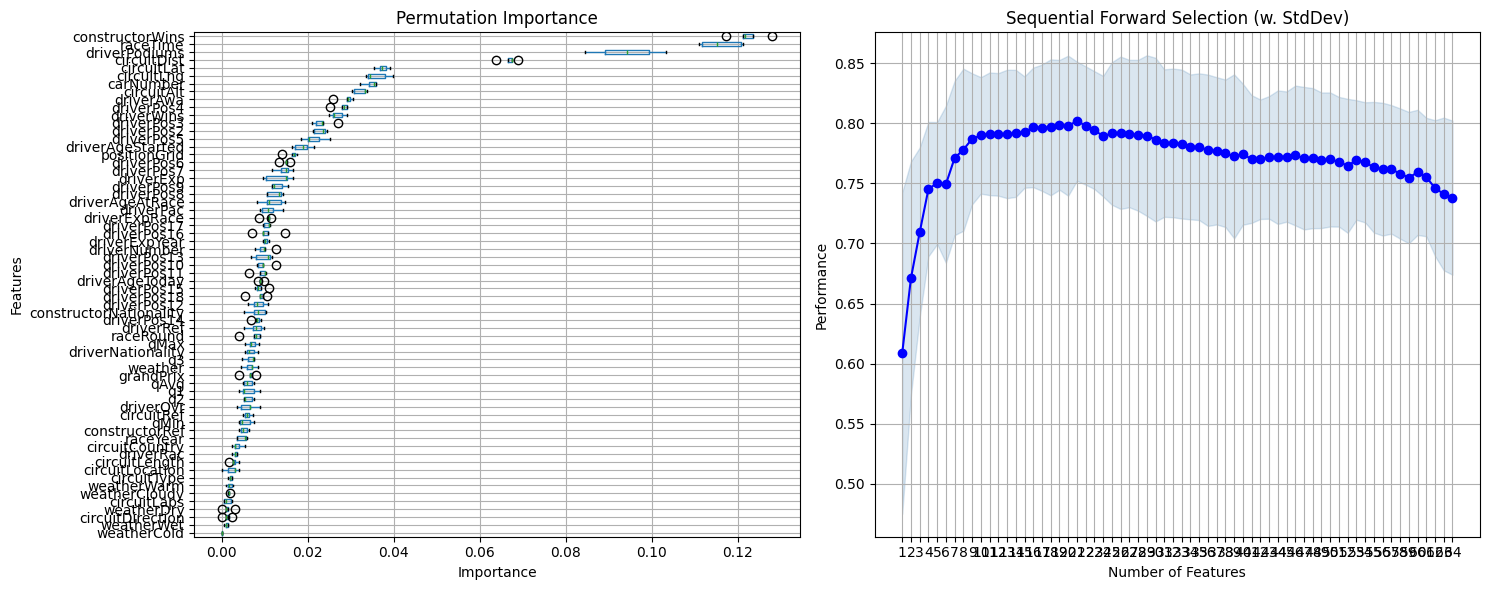

In [3]:
knn = KNeighborsClassifier(n_neighbors=6, metric="cosine", weights="distance")
scoring = make_scorer(balanced_accuracy_score)
model_selection(knn, X, y, tscv, scoring)

## Decision Tree


PI: 0.762 with (1, 4, 17, 18, 40) == ('constructorWins', 'driverExpRace',
	'driverNationality', 'driverWins', 'positionGrid')
SFS: 0.807 with (1, 2, 5, 6, 7, 12, 16, 17, 21, 25, 26, 28, 29, 30, 31, 33, 38, 44, 45,
	48, 50, 52, 53, 54, 55, 56, 57) == ('positionGrid', 'driverRef', 'constructorRef',
	'constructorNationality', 'raceYear', 'circuitLocation', 'circuitAlt', 'driverWins',
	'q3', 'weatherWarm', 'weatherCold', 'weatherWet', 'weatherCloudy', 'circuitType',
	'circuitDirection', 'circuitLaps', 'driverAgeStarted', 'driverPos4', 'driverPos5',
	'driverPos8', 'driverPos10', 'driverPos12', 'driverPos13', 'driverPos14',
	'driverPos15', 'driverPos16', 'driverPos17')
GA: 0.790 with (0, 1, 4, 5, 7, 9, 10, 11, 15, 17, 21, 27, 28, 30, 33, 36, 38, 40, 46,
	47, 50, 51, 53, 54, 58, 61, 63) == ('carNumber', 'positionGrid', 'driverNationality',
	'constructorRef', 'raceYear', 'grandPrix', 'raceTime', 'circuitRef', 'circuitLng',
	'driverWins', 'q3', 'weatherDry', 'weatherWet', 'circuitType', 'circui

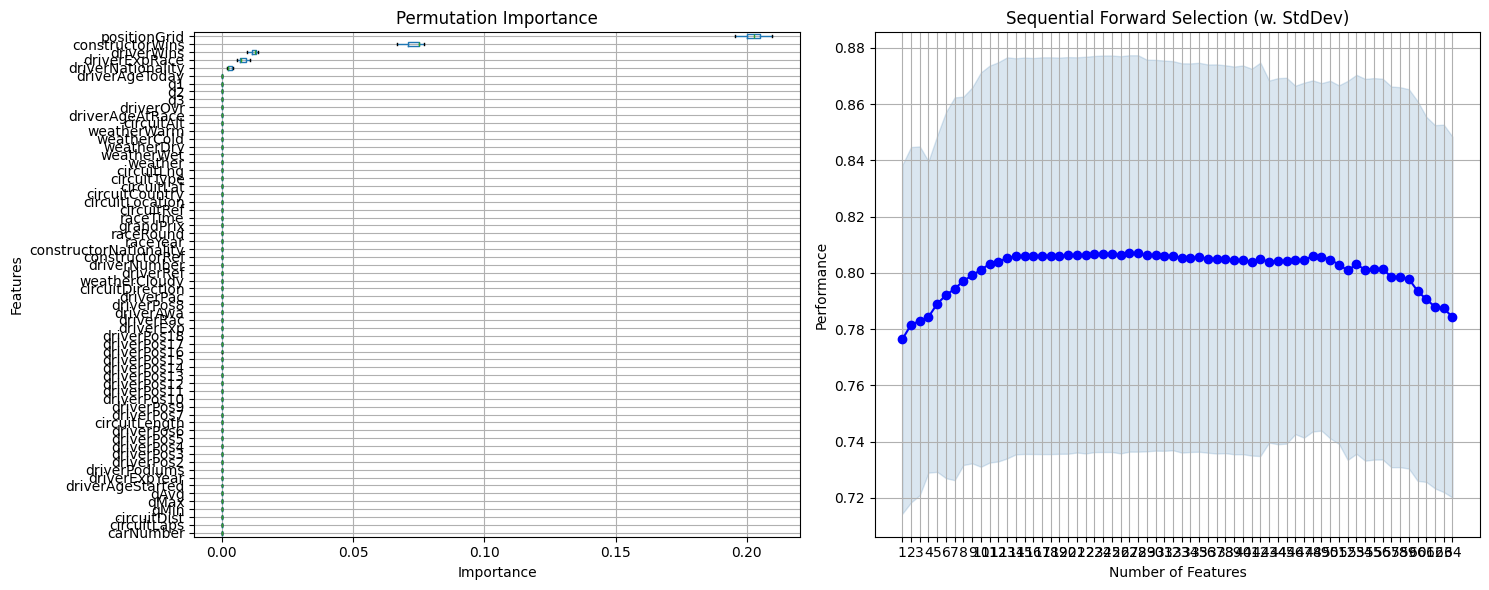

In [4]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, splitter="best")
scoring = make_scorer(balanced_accuracy_score)
model_selection(tree, X, y, tscv, scoring)

## Random Forest


PI: 0.760 with (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
	20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
	43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63) ==
	('carNumber', 'circuitAlt', 'circuitCountry', 'circuitDirection', 'circuitDist',
	'circuitLaps', 'circuitLat', 'circuitLength', 'circuitLng', 'circuitLocation',
	'circuitRef', 'circuitType', 'constructorNationality', 'constructorRef',
	'constructorWins', 'driverAgeAtRace', 'driverAgeStarted', 'driverAgeToday',
	'driverAwa', 'driverExp', 'driverExpRace', 'driverExpYear', 'driverNationality',
	'driverNumber', 'driverOvr', 'driverPac', 'driverPodiums', 'driverPos10',
	'driverPos11', 'driverPos12', 'driverPos13', 'driverPos14', 'driverPos15',
	'driverPos16', 'driverPos17', 'driverPos2', 'driverPos3', 'driverPos4', 'driverPos5',
	'driverPos6', 'driverPos7', 'driverPos8', 'driverPos9', 'driverRac', 'driverRef',
	'driverWins', 'grandPrix

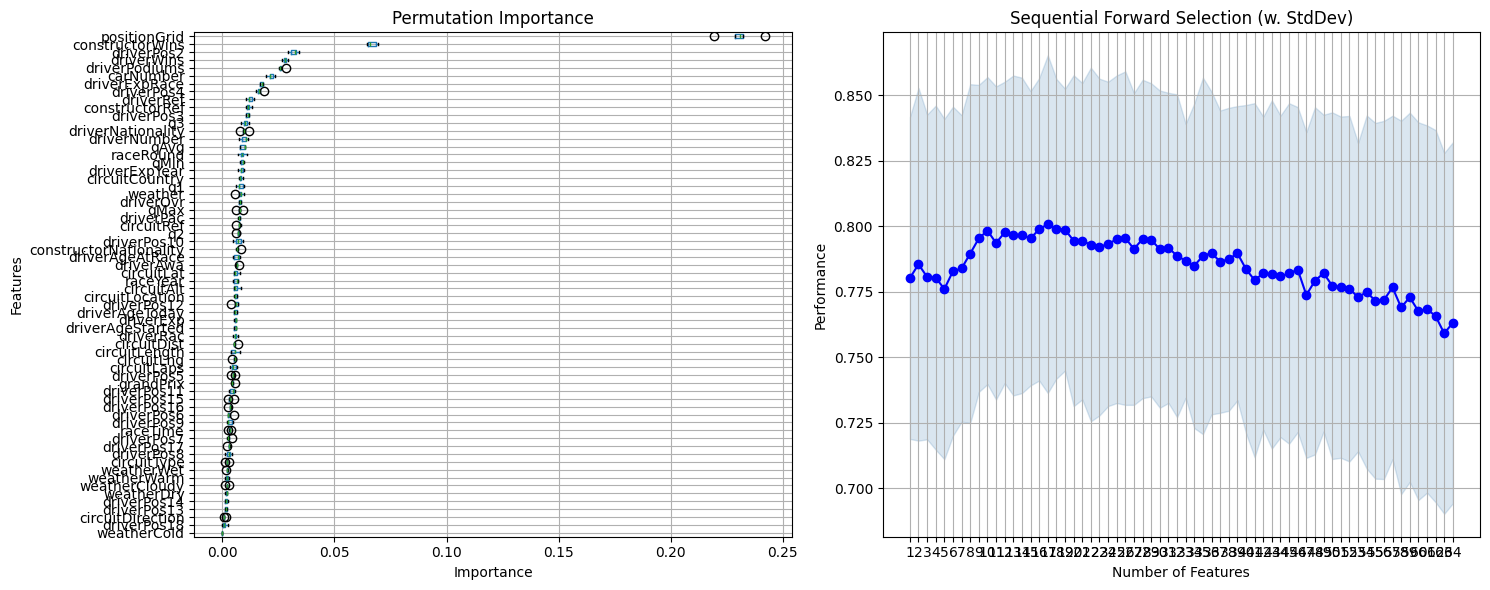

In [5]:
random_forest = RandomForestClassifier(criterion="gini", max_depth=10, n_estimators=200)
scoring = make_scorer(balanced_accuracy_score)
model_selection(random_forest, X, y, tscv, scoring)

## Multilayer Perceptron


PI: 0.791 with (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
	22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
	48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63) == ('carNumber',
	'circuitAlt', 'circuitCountry', 'circuitDirection', 'circuitDist', 'circuitLaps',
	'circuitLat', 'circuitLength', 'circuitLng', 'circuitLocation', 'circuitRef',
	'constructorNationality', 'constructorRef', 'constructorWins', 'driverAgeAtRace',
	'driverAgeStarted', 'driverAgeToday', 'driverAwa', 'driverExp', 'driverExpRace',
	'driverExpYear', 'driverNationality', 'driverNumber', 'driverOvr', 'driverPac',
	'driverPodiums', 'driverPos10', 'driverPos11', 'driverPos12', 'driverPos13',
	'driverPos14', 'driverPos15', 'driverPos16', 'driverPos17', 'driverPos18',
	'driverPos2', 'driverPos3', 'driverPos4', 'driverPos5', 'driverPos6', 'driverPos7',
	'driverPos8', 'driverPos9', 'driverRac', 'driverRef', 'driverWins', 'grandPrix',
	'positionGrid

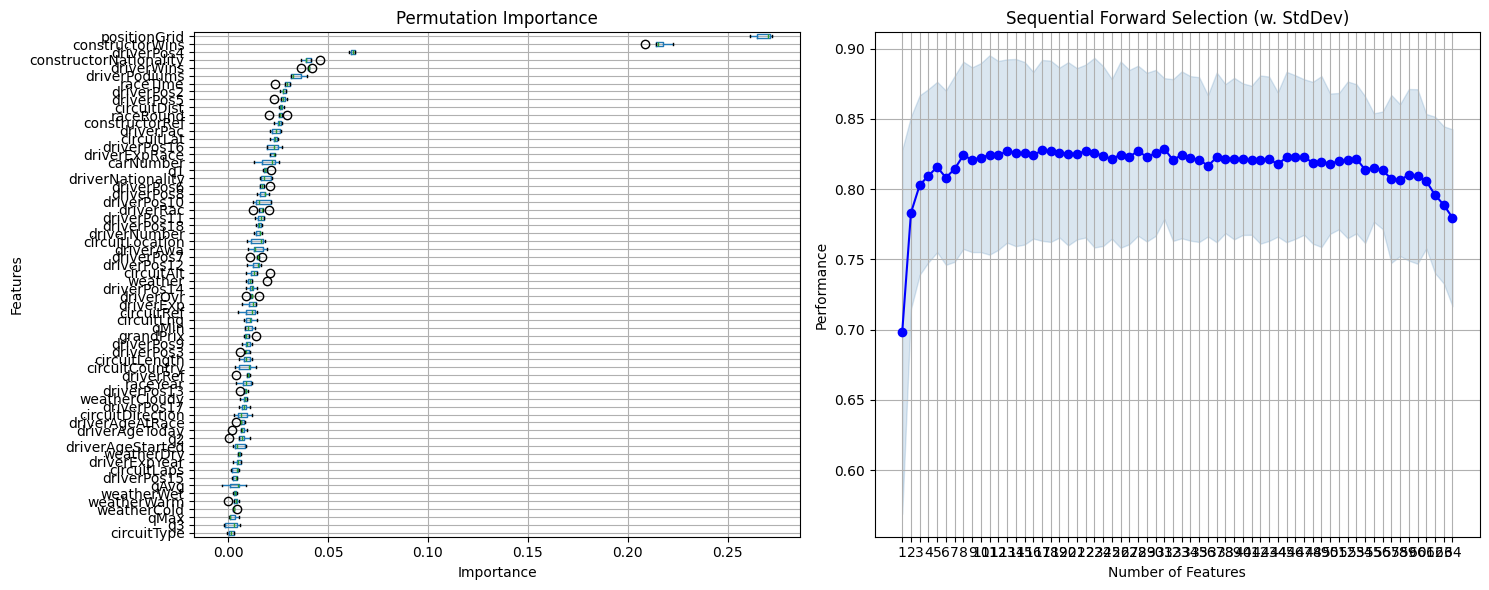

In [6]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(50, 20, 5))
scoring = make_scorer(balanced_accuracy_score)
model_selection(nn, X, y, tscv, scoring)

## Results


Therefore, the selection for each algorithm are as follows

- KNeighborsClassifier: 0.802 with ('carNumber', 'positionGrid', 'driverRef', 'driverNumber', 'constructorRef', 'raceYear', 'driverWins', 'constructorWins', 'weatherCold', 'weatherWet', 'driverAgeStarted', 'driverPos8', 'driverPos9', 'driverPos11', 'driverPos13', 'driverPos14', 'driverPos15', 'driverPos16', 'driverPos17', 'driverPac', 'driverOvr')
- DecisionTreeClassifier: 0.807 with ('positionGrid', 'driverRef', 'constructorRef', 'constructorNationality', 'raceYear', 'circuitLocation', 'circuitAlt', 'driverWins', 'q3', 'weatherWarm', 'weatherCold', 'weatherWet', 'weatherCloudy', 'circuitType', 'circuitDirection', 'circuitLaps', 'driverAgeStarted', 'driverPos4', 'driverPos5', 'driverPos8', 'driverPos10', 'driverPos12', 'driverPos13', 'driverPos14', 'driverPos15', 'driverPos16', 'driverPos17')
- RandomForestClassifier: 0.801 with ('positionGrid', 'driverRef', 'constructorRef', 'raceYear', 'driverWins', 'q2', 'weatherWarm', 'weatherWet', 'driverPodiums', 'driverPos2', 'driverPos5', 'driverPos7', 'driverPos9', 'driverPos10', 'driverPos11', 'driverPos12', 'driverPos16')
- MLPClassifier: 0.829 with ('positionGrid', 'driverNationality', 'circuitRef', 'circuitLocation', 'circuitLat', 'circuitLng', 'driverWins', 'constructorWins', 'q1', 'q2', 'driverAgeToday', 'driverAgeAtRace', 'weather', 'weatherCold', 'weatherWet', 'weatherCloudy', 'circuitDirection', 'circuitLength', 'circuitDist', 'qMin', 'qMax', 'qAvg', 'driverExpYear', 'driverPos8', 'driverPos9', 'driverPos10', 'driverPos13', 'driverPos14', 'driverPos17', 'driverPos18', 'driverExp')
